In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress


# Resource File (CSV)
df497 = pd.read_csv("output_data/Top_497.csv")

In [60]:
#Group df by City
group_all_cities = df497.groupby("City")
#Calculation of the average cost and user-rating per city
#Calculate the average cost for two per city
average_all_cities = pd.DataFrame(group_all_cities["Average Cost for two"].mean())

average_all_cities

,Average Cost for two
City,
Adelaide,79.030612
Brisbane,72.730000
Melbourne,120.250000
Perth,82.090909
Sydney,98.050000


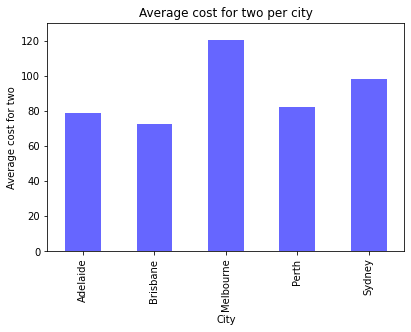

<Figure size 432x288 with 0 Axes>

In [61]:
average_all_cities.plot(kind="bar", facecolor="blue", alpha=0.6, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Average cost for two per city")
plt.ylabel("Average cost for two")
plt.xlim(-0.5,len(average_all_cities)-0.5)
plt.ylim(0,max(average_all_cities["Average Cost for two"])+10)
# Show plot
plt.show()
plt.tight_layout()

In [62]:
#Calculate the median of the average cost for two per city
median_all_cities = pd.DataFrame(group_all_cities
                                 ["Average Cost for two"].median())
median_all_cities

,Average Cost for two
City,
Adelaide,75
Brisbane,60
Melbourne,90
Perth,65
Sydney,80


In [63]:
#Calculating the median across the 500 restaurants in Australia
median = df497["Average Cost for two"].median()
median

70.0

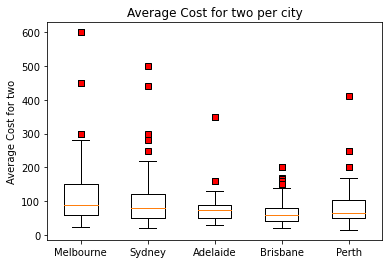

In [64]:
# Generate a box plot of the average cost for two across the five cities
Rest_Melbourne = df497.loc[df497["City"]=="Melbourne","Average Cost for two"]
Rest_Sydney = df497.loc[df497["City"]=="Sydney","Average Cost for two"]
Rest_Adelaide = df497.loc[df497["City"]=="Adelaide","Average Cost for two"]
Rest_Brisbane = df497.loc[df497["City"]=="Brisbane","Average Cost for two"]
Rest_Perth = df497.loc[df497["City"]=="Perth","Average Cost for two"]

all_cities_data = [Rest_Melbourne,Rest_Sydney, Rest_Adelaide,Rest_Brisbane,Rest_Perth]
all_cities = ["Melbourne", "Sydney", "Adelaide", "Brisbane", "Perth"]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title('Average Cost for two per city')
ax1.set_xticklabels(all_cities, rotation=0, fontsize=10)
ax1.set_ylabel('Average Cost for two')
ax1.boxplot(all_cities_data, flierprops=red_square)
#Save image 
plt.savefig('images/Outliers per city.png')
plt.show()

In [65]:
#Calculate the average user rating per city
cities_average_rating = pd.DataFrame(group_all_cities["User Rating"].mean())
#Insert a column with average rating
cities_average_rating.round(2)



,User Rating
City,
Adelaide,4.39
Brisbane,4.51
Melbourne,4.67
Perth,4.47
Sydney,4.63


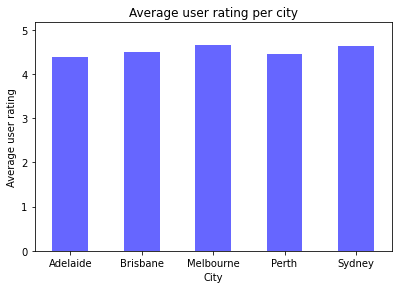

<Figure size 432x288 with 0 Axes>

In [66]:
#Plotting the average rating per city
cities_average_rating.plot(kind="bar", facecolor="blue", alpha=0.6, rot=0,
                           figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Average user rating per city")
plt.ylabel("Average user rating")
plt.xlim(-0.5,len(cities_average_rating)-0.5)
plt.ylim(0,max(cities_average_rating["User Rating"])+0.5)
#Save image
plt.savefig('images/Average User rating per city.png')
# Show plot
plt.show()
plt.tight_layout()

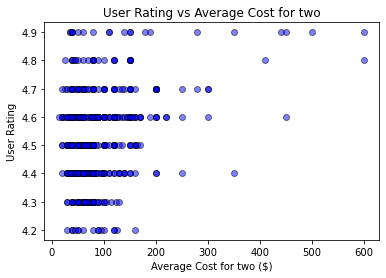

The correlation coefficient between User Rating and Average Cost for two is 0.29


In [67]:
#Scatter plot of the average cost two and average rating
#Scatter plot Average cost for two vs User Rating
x2 = df497["Average Cost for two"]
y2 = df497["User Rating"] 

plt.scatter(x2,y2, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Average Cost for two ($)')
plt.ylabel('User Rating')
plt.title('User Rating vs Average Cost for two')
plt.savefig('images/User Rating vs. Average Cost for two.png')
plt.show()
print(f"The correlation coefficient between User Rating and Average Cost for two is {round(st.pearsonr(x_values,y_values)[0],2)}")

The correlation coefficient between User Rating and Average Cost for two is 0.29
The linear regression equation is : y = 0.0x + 4.47
The r-squared is: 0.08187257960852534


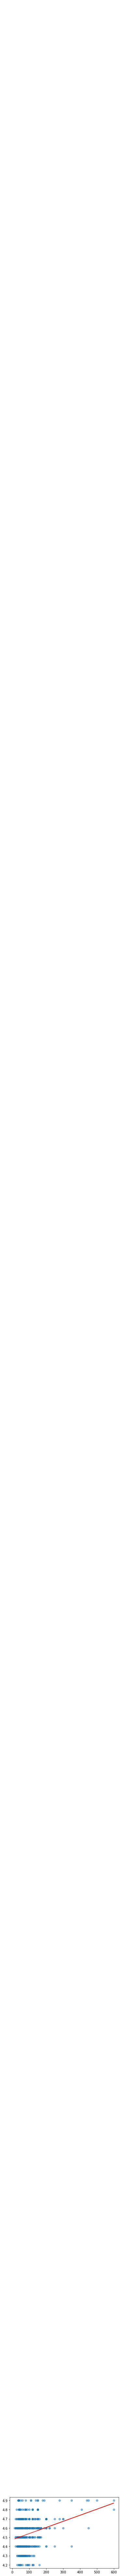

In [52]:
#Correlation coefficient:
x_values = df497["Average Cost for two"]
y_values = df497["User Rating"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression equation is : {line_eq}")
plt.annotate(line_eq,(5,32),fontsize=15,color="red")
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'linregress' is not defined

In [33]:
df497.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,224,"French, European"
1,1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese
3,3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
4,4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


In [35]:
#Group df by City
group_all_cities = df497.groupby("City")
#Calculation of the average cost and user-rating per city
#Calculate the average cost for two per city
price_range = pd.DataFrame(group_all_cities["Price Range"].value_counts())

price_range

Price Range
City      Price Range             
Adelaide  3                     53
          2                     28
          4                     17
Brisbane  2                     39
          3                     36
          4                     22
          1                      3
Melbourne 4                     48
          3                     35
          2                     15
          1                      2
Perth     3                     38
          2                     34
          4                     26
          1                      1
Sydney    4                     38
          3                     32
          2                     25
          1                      5

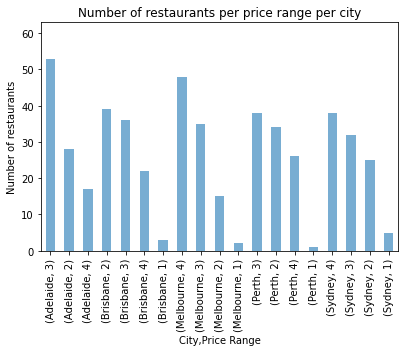

<Figure size 432x288 with 0 Axes>

In [37]:
price_range.plot(kind="bar", alpha=0.6, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Number of restaurants per price range per city")
plt.ylabel("Number of restaurants")
plt.xlim(-0.5,len(price_range)-0.5)
plt.ylim(0,max(price_range["Price Range"])+10)
# Show plot
plt.show()
plt.tight_layout()